## DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Problem Statement : Build up the model to predict which employees are likely to attire.


In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the data
emp_data = pd.read_csv("IBM Attrition Data.csv ")

In [3]:
# View first 5 records
emp_data.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [5]:
emp_data.describe()

Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009         0.706476   
min           1.000000    1009.000000            0.000000         1.000000   
25%           2.000000    2911.000000            1.000000         2.000000   
50%           3.000000    4919.000000            2.000000         3.000000   
75%           4.000000    8379.000000            4.000000         3.000000   
max           4.000000   19999.000000            9.000000         4.000000   

       YearsAtCompany  
count     1470.000000  
mean         7.008163  
std          6.126525  
min          0.000000  
25%          3.000000  
50%          5.000000  
75%          9.000000  
max         40.000000

In [18]:
emp_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
emp_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

## Exploratory data Analysis

In [4]:
# delete the null values
emp_data.dropna()

Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0     Life Sciences                        2                4        Single   
1     Life Sciences                        3                2       Married   
2             Other                        4                3        Single   
3     Life Sciences                        4                3       Married   
4           Medical                        1                2       Married   
...             ...                      ...              ...           ...   
1465        Medical                        3                4       Married   
1466        Medical                        4                1       Married   
1467  Life Sciences                        2                2       Married   
1468        Medical                        4                2       Married   
1469        Medical                        2                3       Married   

      MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0              5993                   8                1               6  
1              5130                   1                3              10  
2              2090                   6                3               0  
3              2909                   1                3               8  
4              3468                   9                3               2  
...             ...                 ...              ...             ...  
1465           2571                   4                3               5  
1466           9991                   4                3               7  
1467           6142                   1                3               6  
1468           5390                   2                2               9  
1469           4404                   2                4               4  

[1470 rows x 13 columns]

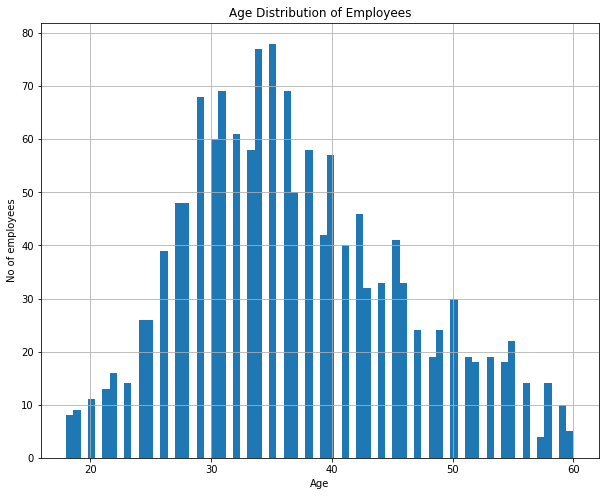

In [14]:
# plot the histogram
plt.figure(figsize=(10,8))
emp_data['Age'].hist(bins=70)
plt.title("Age Distribution of Employees")
plt.xlabel('Age')
plt.ylabel('No of employees')
plt.show()

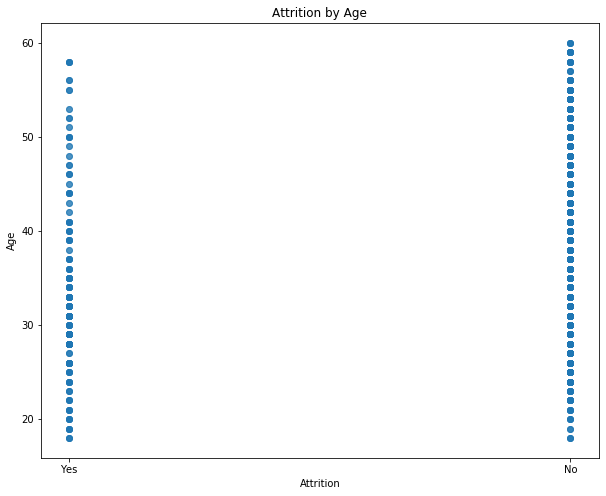

In [16]:
# Explore attrition by age
plt.figure(figsize =(10,8))
plt.scatter(emp_data.Attrition,emp_data.Age, alpha =0.55)
plt.title("Attrition by Age")
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

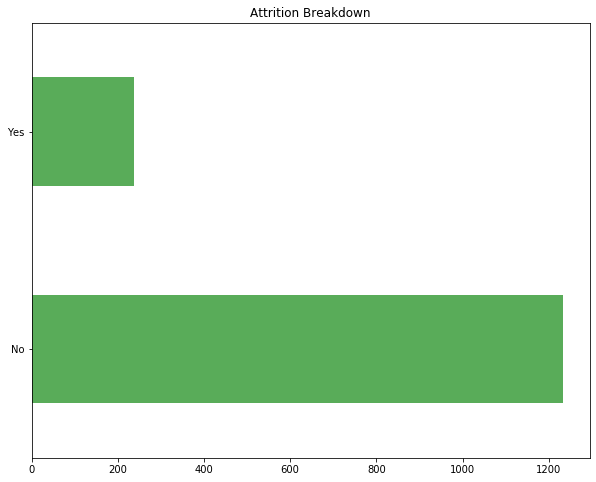

In [23]:
# explore data for left employees breakdown
plt.figure(figsize=(10,8))
emp_data.Attrition.value_counts().plot(kind = 'barh' ,color='green',alpha =0.65)
plt.title("Attrition Breakdown")
plt.show()

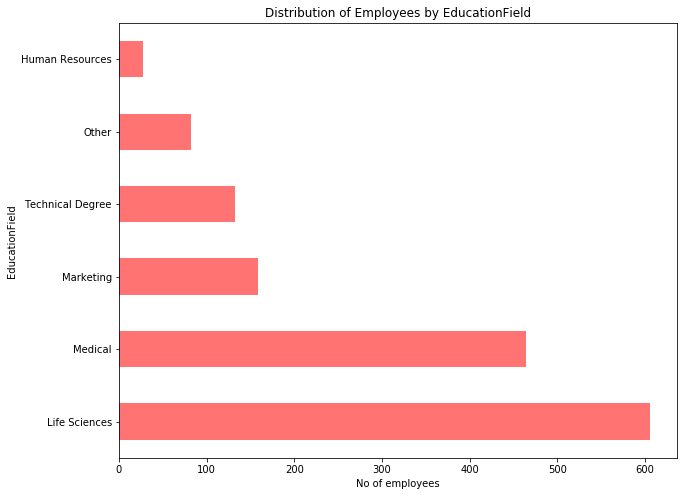

In [26]:
# find out the distribution of employees by the education field
plt.figure(figsize=(10,8))
emp_data.EducationField.value_counts().plot(kind='barh',color='red',alpha=0.55)
plt.title('Distribution of Employees by EducationField')
plt.xlabel('No of employees')
plt.ylabel('EducationField')
plt.show()


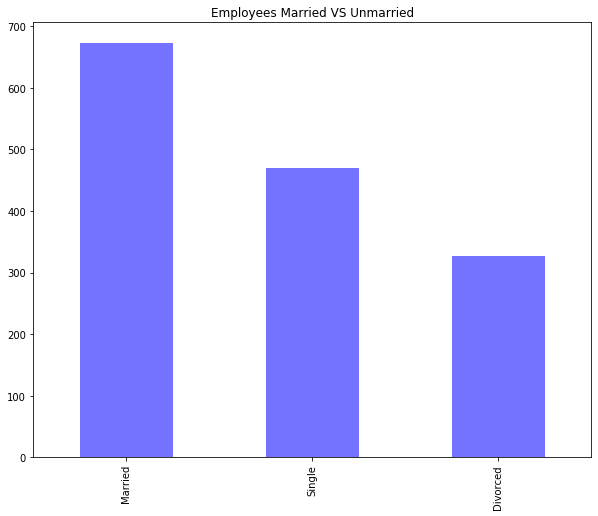

In [28]:
# No of married and unmarried employees
plt.figure(figsize=(10,8))
emp_data.MaritalStatus.value_counts().plot(kind='bar',color='blue',alpha=0.55)
plt.title('Employees Married VS Unmarried')
plt.show()

In [29]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
WorkLifeBalance            1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


## Feature Engeneering
Convert the categorical data into Numerical data to apply Machine learning Models.

In [30]:
# Replace Attrition fileds yes, no to 1,0
emp_data['Attrition'].replace('Yes',1, inplace= True)
emp_data['Attrition'].replace('No',0, inplace = True)

In [31]:
emp_data.head()

Age  Attrition              Department  DistanceFromHome  Education  \
0   41          1                   Sales                 1          2   
1   49          0  Research & Development                 8          1   
2   37          1  Research & Development                 2          2   
3   33          0  Research & Development                 3          4   
4   27          0  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [34]:
emp_data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [35]:
emp_data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [36]:
emp_data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [37]:
emp_data['Department'].replace('Sales',1, inplace =True)
emp_data['Department'].replace('Research & Development',2, inplace =True)
emp_data['Department'].replace('Human Resources',3, inplace =True)


In [39]:
emp_data.head()

Age  Attrition  Department  DistanceFromHome  Education EducationField  \
0   41          1           1                 1          2  Life Sciences   
1   49          0           2                 8          1  Life Sciences   
2   37          1           2                 2          2          Other   
3   33          0           2                 3          4  Life Sciences   
4   27          0           2                 2          1        Medical   

   EnvironmentSatisfaction  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                        2                4        Single           5993   
1                        3                2       Married           5130   
2                        4                3        Single           2090   
3                        4                3       Married           2909   
4                        1                2       Married           3468   

   NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                   8                1               6  
1                   1                3              10  
2                   6                3               0  
3                   1                3               8  
4                   9                3               2

In [42]:
emp_data['EducationField'].replace('Life Sciences',1, inplace =True)
emp_data['EducationField'].replace('Other',2, inplace =True)
emp_data['EducationField'].replace('Medical',3, inplace =True)
emp_data['EducationField'].replace('Marketing',4, inplace =True)
emp_data['EducationField'].replace('Technical Degree',5, inplace =True)
emp_data['EducationField'].replace('Human Resources',6, inplace =True)


In [43]:
emp_data.head()

Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0   41          1           1                 1          2               1   
1   49          0           2                 8          1               1   
2   37          1           2                 2          2               2   
3   33          0           2                 3          4               1   
4   27          0           2                 2          1               3   

   EnvironmentSatisfaction  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                        2                4        Single           5993   
1                        3                2       Married           5130   
2                        4                3        Single           2090   
3                        4                3       Married           2909   
4                        1                2       Married           3468   

   NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                   8                1               6  
1                   1                3              10  
2                   6                3               0  
3                   1                3               8  
4                   9                3               2

In [44]:
emp_data['MaritalStatus'].replace('Single',1, inplace= True)
emp_data['MaritalStatus'].replace('Married', 2, inplace= True )
emp_data['MaritalStatus'].replace('Divorced',3,inplace =True)

In [45]:
emp_data.head()

Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0   41          1           1                 1          2               1   
1   49          0           2                 8          1               1   
2   37          1           2                 2          2               2   
3   33          0           2                 3          4               1   
4   27          0           2                 2          1               3   

   EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0                        2                4              1           5993   
1                        3                2              2           5130   
2                        4                3              1           2090   
3                        4                3              2           2909   
4                        1                2              2           3468   

   NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                   8                1               6  
1                   1                3              10  
2                   6                3               0  
3                   1                3               8  
4                   9                3               2

In [54]:
x_features = emp_data[['Age','Department','DistanceFromHome','Education','EducationField','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']]

In [52]:
y_feature = emp_data['Attrition']

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model = model.fit(x_features,y_feature)



In [60]:
#check the accuracy on the training set
model.score(x_features,y_feature)

0.8435374149659864

In [64]:
#split data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_features,y_feature,test_size =0.3,random_state=0)
model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit(x_features,y_feature)

In [65]:
#check the accuracy on the training set
model2.score(x_features,y_feature)

0.8435374149659864

In [66]:
predicted = model2.predict(X_test)

In [67]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
probs = model2.predict_proba(X_test)

In [69]:
probs

array([[0.86577154, 0.13422846],
       [0.72699221, 0.27300779],
       [0.76264435, 0.23735565],
       [0.83925657, 0.16074343],
       [0.73268797, 0.26731203],
       [0.89413093, 0.10586907],
       [0.70421091, 0.29578909],
       [0.61820297, 0.38179703],
       [0.96648757, 0.03351243],
       [0.82058074, 0.17941926],
       [0.9639969 , 0.0360031 ],
       [0.65930413, 0.34069587],
       [0.97555025, 0.02444975],
       [0.73294468, 0.26705532],
       [0.91796684, 0.08203316],
       [0.93185797, 0.06814203],
       [0.93265204, 0.06734796],
       [0.91740593, 0.08259407],
       [0.80734262, 0.19265738],
       [0.7007856 , 0.2992144 ],
       [0.70201019, 0.29798981],
       [0.9597736 , 0.0402264 ],
       [0.87102814, 0.12897186],
       [0.89872456, 0.10127544],
       [0.55858778, 0.44141222],
       [0.81479109, 0.18520891],
       [0.82725713, 0.17274287],
       [0.97367236, 0.02632764],
       [0.64087423, 0.35912577],
       [0.88622653, 0.11377347],
       [0.

In [70]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,predicted))
print(metrics.roc_auc_score(Y_test,predicted))

0.8390022675736961
0.5102425876010781


In [72]:
print(metrics.confusion_matrix(Y_test,predicted))
print(metrics.classification_report(Y_test,predicted))
     

[[368   3]
 [ 68   2]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.40      0.03      0.05        70

    accuracy                           0.84       441
   macro avg       0.62      0.51      0.48       441
weighted avg       0.77      0.84      0.78       441



In [75]:
print(X_test)

      Age  Department  DistanceFromHome  Education  EducationField  \
442    36           1                10          4               3   
1091   33           2                25          3               1   
981    35           1                18          4               4   
785    40           2                20          4               5   
1332   29           2                24          2               1   
...   ...         ...               ...        ...             ...   
817    36           2                18          4               1   
399    31           2                 1          2               1   
458    40           1                28          3               2   
406    52           2                 3          3               3   
590    33           2                 7          3               3   

      JobSatisfaction  MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
442                 4              1           9980                   1   
1091     

In [77]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0,1.0,1.0,1.0,1.0]]
print(model.predict_proba(kk))

[[5.32907052e-15 1.00000000e+00]]


In [87]:
# import the dependencies
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [79]:
  raw_data = {"first_name": ["Jason", "Molly", "Tina", "Jake", "Amy"],
                "last_name": ["Miller", "Jacobson", "Ali", "Milner", "Cooze"],
                "email": ["jas203@gmail.com", "momomolly@gmail.com", np.NAN,
                          "battler@milner.com", "Ames1234@yahoo.com"]}

In [83]:
df = pd.DataFrame(raw_data,columns=["'first_name", "last_name", "email"])
print();print(df)


  'first_name last_name                email
0         NaN    Miller     jas203@gmail.com
1         NaN  Jacobson  momomolly@gmail.com
2         NaN       Ali                  NaN
3         NaN    Milner   battler@milner.com
4         NaN     Cooze   Ames1234@yahoo.com


## Apply different datamunging operations

In [84]:
#if we want to check email which sring contains "gmail"
print(df['email'].str.contains('gmail'))

0     True
1     True
2      NaN
3    False
4    False
Name: email, dtype: object


In [90]:
#we want to seperate the email into parts such that the characters before "@" becomes one string and after and before "." becomes one. At last the remaining becomes the one string.
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

print(df['email'].str.findall(pattern,flags= re.IGNORECASE))

0       [(jas203, gmail, com)]
1    [(momomolly, gmail, com)]
2                          NaN
3     [(battler, milner, com)]
4     [(Ames1234, yahoo, com)]
Name: email, dtype: object


In [92]:
floodingReports = pd.Series([5, 6, 2, 9, 12])
print(floodingReports)

0     5
1     6
2     2
3     9
4    12
dtype: int64


In [93]:
floodingReports = pd.Series([5, 6, 2, 9, 12], index=["Cochise County", "Pima County",
                                "Santa Cruz County", "Maricopa County", "Yuma County"])

In [94]:
print(floodingReports)

Cochise County        5
Pima County           6
Santa Cruz County     2
Maricopa County       9
Yuma County          12
dtype: int64


In [95]:
  print(floodingReports["Cochise County"])

5


In [97]:
df["newsCoverage"] = pd.Series([42.3, 92.1, 12.2, 39.3, 30.2])
print(df)

  'first_name last_name                email  newsCoverage
0         NaN    Miller     jas203@gmail.com          42.3
1         NaN  Jacobson  momomolly@gmail.com          92.1
2         NaN       Ali                  NaN          12.2
3         NaN    Milner   battler@milner.com          39.3
4         NaN     Cooze   Ames1234@yahoo.com          30.2


In [98]:
import matplotlib.pyplot as plt
import statistics as stats
import pandas as pd
import random
import seaborn as sns



In [99]:
# create empt datframe
df = pd.DataFrame()

In [100]:
#Adding columns
df['x'] = random.sample(range(1,100),75)
df['y'] = random.sample(range(1,100),75)


In [101]:
print();print(df.head())


    x   y
0   1  18
1  51  35
2  21  83
3  54  94
4  20  74


In [102]:
print(df)

     x   y
0    1  18
1   51  35
2   21  83
3   54  94
4   20  74
..  ..  ..
70  83   2
71  62  57
72  86  43
73  80  80
74  76  98

[75 rows x 2 columns]



**How we can determine Pearson's correlation in Python**

    x   y
0  36  70
1  77  78
2  67  86
3   5  82
4  51  18

Pearson's correlation coefficient is:  0.006967607231115477


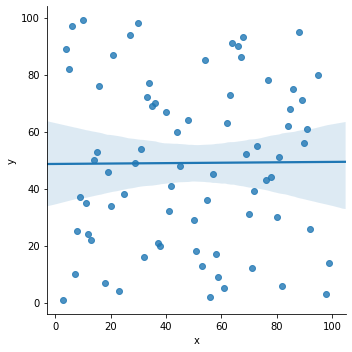

In [109]:
def ProjectPro_Ex_150():
    print()
    print('**How we can determine Pearson\'s correlation in Python**')

    # loading libraries
    import matplotlib.pyplot as plt
    import statistics as stats
    import pandas as pd
    import random
    import seaborn as sns

    # Creating empty dataframe
    df = pd.DataFrame()
    
    # Adding columns
    df['x'] = random.sample(range(1, 100), 75)
    df['y'] = random.sample(range(1, 100), 75)

    # Viewing first few rows of data
    print(); print(df.head())

    # Calculating Pearson’s Correlation Coefficient
    def pearson(x,y):
        # Create n, the number of observations in the data
        n = len(x)
        # Create lists to store the standard scores
        standard_score_x = []; standard_score_y = [];
        # Calculate the mean of x
        mean_x = stats.mean(x)
        # Calculate the standard deviation of x
        standard_deviation_x = stats.stdev(x)
        # Calculate the mean of y
        mean_y = stats.mean(y)
        # Calculate the standard deviation of y
        standard_deviation_y = stats.stdev(y)
        # For each observation in x
        for observation in x:
            # Calculate the standard score of x
            standard_score_x.append((observation - mean_x)/standard_deviation_x)
        # For each observation in y
        for observation in y:
            # Calculate the standard score of y
            standard_score_y.append((observation - mean_y)/standard_deviation_y)
        # Multiple the standard scores together, sum them, then divide by n-1, return that value
        return (sum([i*j for i,j in zip(standard_score_x, standard_score_y)]))/(n-1)

    # Show Pearson's Correlation Coefficient
    result = pearson(df.x, df.y)
    print()
    print("Pearson\'s correlation coefficient is: ", result)
    sns.lmplot('x', 'y', data=df, fit_reg=True)
    plt.show()

ProjectPro_Ex_150()